# Approximated Methods

In [1]:
import numpy as np
import itertools
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

sys.path.append( os.path.join('..') )

from RLearning.environment import RandomDiscreteWalk, MontainCar

from RLearning.monte_carlo import MonteCarlo
from RLearning.temporal_difference import NStepSarsa
from RLearning.feature_extraction import TileCoding
from RLearning.interfaces import ApproximatedInterface

from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error

## 1000-state Random Walk 

In [2]:
envrioment = RandomDiscreteWalk( n_states=1000, step_size=100 )

In [3]:
control_fex = TileCoding( n_bins=[10+1, 1], limits=[ [0, 1000], [0,0] ], tile_shift=[0,0] )
control_reg = SGDRegressor( alpha=2*10e-5, random_state=214, learning_rate="constant" )

env_interface= ApproximatedInterface( control_feature_extractor=control_fex, 
                                      control_value_approximator=control_reg
                                    )

mc_agent = MonteCarlo( env_interface=env_interface, episodes=500000 )

In [4]:
%%time
mc_agent.fit( envrioment )

CPU times: total: 16h 26min 18s
Wall time: 13h 43min 15s


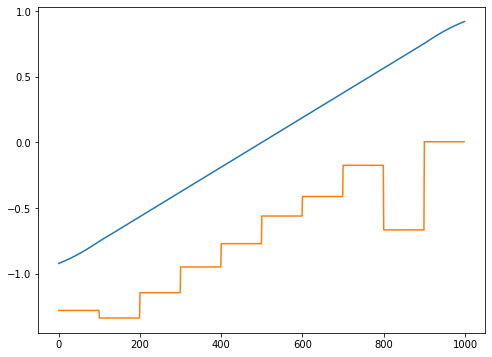

In [5]:
true_values = envrioment.compute_true_solution()[:-1]
pred_values = np.array([ mc_agent.env_interface.get_control_value(i,0) for i in range(1, 1000) ])

fig, ax = plt.subplots( figsize=(8,6) )

ax.plot(true_values)
ax.plot(pred_values)

## Montain car task

In [4]:
envrioment = MontainCar()

In [7]:
%%time
alphas = np.linspace(0, 1, 20)/8

sgd_reg = SGDRegressor( alpha=0.5/8, random_state=214, learning_rate="constant" )
tc_ext = TileCoding( n_bins=[8, 8, 3], 
                     limits=[[-1.21, 0.51], [-0.0071, 0.0071], [0,2]], 
                     tile_shift=[0,0,0] )

app_interface = ApproximatedInterface( control_feature_extractor=tc_ext,
                                       control_value_approximator=sgd_reg
                                     )

                                     
nstep_sarsa = NStepSarsa( env_interface=app_interface, episodes=50, n_steps=4 )
nstep_sarsa.fit( envrioment )

CPU times: total: 7min 4s
Wall time: 7min 7s
